<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/Aula_de_SC_EDPparte01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equações Diferenciais Parciais (EDPs)



> Este tutorial é baseado no material "[CFD Python: 12 steps to Navier-Stokes](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)" de Lorena A. Barba. 



## Equação de Convecção Linear 1-D

> Bloco com recuo



Vamos começar a falar de EDPs com a equação de Convecção Linear em 1-D. 

A equação de Convecção Linear 1-D é o modelo mais simples e básico que pode ser usado para se estudar CFD. Ela é dada por:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

Com determinadas condições iniciais (uma onda), a equação representa a propagação dessa onda inicial com velocidade $c$, sem mudança de forma. Deixe a condição inicial ser $u(x,0)=u_0(x)$. A solução exata desta equação é $u(x,t)=u_0(x-ct)$. 

Discretizamos esta equação tanto no espaço como no tempo, utilizando o esquema da Diferença Finita para a frente para a derivada do tempo e o esquema da Diferença Finita para trás para a derivada do espaço. Consideramos a discretização da coordenada espacial $x$ em pontos que indexamos de $i=0$ a $N$, e os intervalos de tempo discretos de tamanho $\Delta t$.

A partir da definição de uma derivada (e simplesmente removendo o limite), sabemos que:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Nossa equação discretizada será dada por: 

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Onde $n$ e $n+1$ são duas etapas consecutivas no tempo, enquanto $i-1$ e $i$ são dois pontos vizinhos da coordenada discretizada $x$. Se forem dadas condições iniciais, então o único desconhecido nesta discretização é $u_i^{n+1}$. Resolvendo para $u_i^{n+1}$ temos:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Vamos agora implementar isso numericamente. 






In [ ]:
# importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt 

Agora vamos definir algumas variáveis; queremos definir uma grade de pontos uniformemente espaçados dentro de um domínio espacial que tenha 2 unidades de largura, ou seja, $x_i\in(0,2)$.  Vamos definir uma variável *nx*, que será o número de pontos da grade que queremos e *dx* será a distância entre qualquer par de pontos adjacentes.  

In [ ]:
nx = 41
dx = 2/(nx-1)
nt = 25
dt = 0.025 
c =1

Precisamos também de estabelecer as nossas condições iniciais. A velocidade inicial $u_0$ é dada como  $u = 2$ no intervalo $0,5 \leq x \leq 1$ e $u = 1$ em qualquer outro lugar em $(0,2)$ (ou seja, uma função de chapéu).

Aqui, utilizamos a função `ones()` definindo uma matriz `numpy` que possui `nx` elementos com cada valor igual a 1.

In [ ]:
u = np.ones(nx) 
u[int(0.5/dx):int(1/dx+1)] = 2

print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Agora visualizar essas condições iniciais utilizando o Matplotlib. 

Aqui, utilizamos a sintaxe para um simples gráfico 2D: plot(x,y), onde os valores x são pontos da grade uniformemente distribuídos:


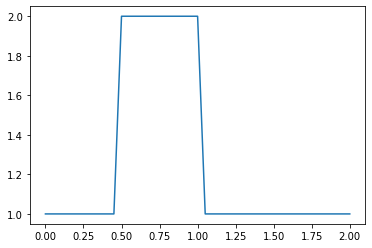

In [ ]:
plt.plot(np.linspace(0,2,nx),u)
plt.show()

Agora, vamos implementar a discretização da equação de convecção usando um esquema de diferença finita.  

Para cada elemento da nossa matriz `u`, precisamos realizar a operação

 $$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Armazenaremos o resultado num novo conjunto (temporário) `un`, que será a solução $u$ para a próxima etapa.  Repetiremos esta operação por tantos passos de tempo quantos especificarmos e depois poderemos ver até que ponto a onda convectou.  


Agora, temos duas operações iterativas: uma no espaço e outra no tempo (aprenderemos de forma diferente mais tarde), por isso começaremos por colocar um laço dentro do outro. Note-se a utilização da função  `range()`. Quando escrevemos: para i no intervalo(1,nx)`a iteração será feita através da matriz `u`, mas saltaremos o primeiro elemento (o elemento zero). *Por que?*  

In [ ]:
un = np.ones(nx)

for n in range(nt):
  un = u.copy()
  for i in range(1,nx):
    u[i] = un[i] - c* dt/dx*(un[i]-un[i-1])

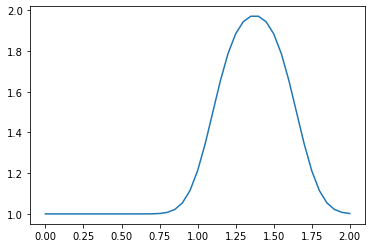

In [ ]:
plt.plot(np.linspace(0,2,nx),u);

## Convecção não-linear

Agora vamos implementar a convecção não linear utilizando os mesmos métodos que na etapa acima.  A equação de convecção 1D é:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Em vez de um factor constante $c$ multiplicando o segundo termo, agora temos a solução $u$ multiplicando-o. Assim, o segundo termo da equação é agora *não-linear*. Vamos utilizar a mesma discretização que na etapa acima - diferença para a frente no tempo e diferença para trás no espaço. Aqui está a equação discretizada.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Resolvendo para o único termo desconhecido, $u_i^{n+1}$, temos:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

Como antes, o código Python começa por carregar as bibliotecas necessárias. Depois, declaramos algumas variáveis que determinam a discretização no espaço e no tempo (altere estes parâmetros para ver o que acontece). Depois, criamos a condição inicial $u_0$ inicializando a array para a solução usando $u = 2\ @\ 0,5 \leq x \leq 1$ e $u = 1$ em qualquer outro lugar em $(0,2)$ (i.e., uma função de chapéu).

In [ ]:
nx = 41
dx = 2 / (nx - 1)
nt = 40    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

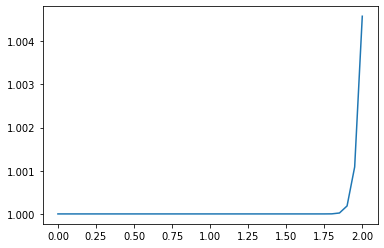

In [ ]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
    
     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ###then uncomment it and run the cell to evaluate Step 2   
      
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) 

        
plt.plot(numpy.linspace(0, 2, nx), u) ##Plot the results
plt.show()


Provavelmente, você deve estar curioso porque é que a alteração dos parâmetros de discretização afeta a sua solução de uma forma tão drástica.

Nos primeiros passos, utilizamos as mesmas condições iniciais e de contorno. Com os parâmetros que sugerimos inicialmente, a grade tem 41 pontos e a duração do intervalo de tempo é de 0,25 segundos. Agora, vamos experimentar aumentar o tamanho da nossa grade. O código abaixo é idêntico ao código que utilizamos no acima, mas aqui foi agrupado numa função para que possamos examinar facilmente o que acontece à medida que ajustamos apenas uma variável: o tamanho da grade.

In [ ]:
def linearconv(nx):
  dx = 2/(nx-1)
  nt =20
  dt = 0.025 
  c= 1 

  u = np.ones(nx)
  u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s
  un= np.ones(nx)

  for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
      u[i] = un[i] - c * dt / dx * (un[i]-un[i-1])


  plt.plot(np.linspace(0,2,nx),u)
  plt.show()    


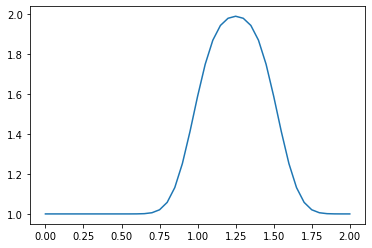

In [ ]:
linearconv(41)

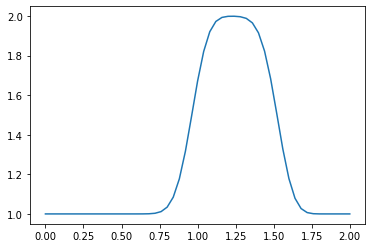

In [ ]:
linearconv(51)

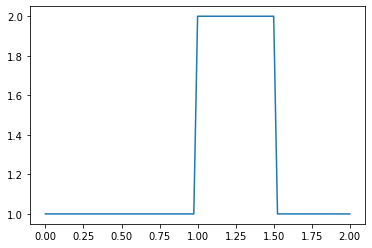

In [ ]:
linearconv(81)

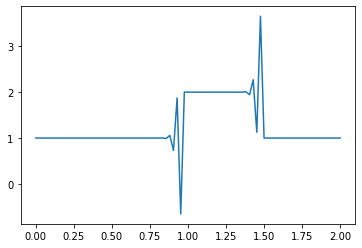

In [ ]:
linearconv(85)

Para responder a essa pergunta, temos que pensar um pouco sobre o que estamos realmente implementando em código.  

Em cada iteração de nosso ciclo de tempo, usamos os dados existentes sobre nossa onda para estimar a velocidade da onda na etapa de tempo subseqüente.  Inicialmente, o aumento do número de pontos de grade retornou respostas mais precisas.  Houve menos difusão numérica e a onda quadrada se parecia muito mais com uma onda quadrada do que no nosso primeiro exemplo.  

Cada iteração de nosso loop de tempo cobre um passo de comprimento $\Delta t$, que temos definido como 0,025

Durante esta iteração, avaliamos a velocidade da onda em cada um dos pontos de $x$ que criamos.  No último gráfico, algo claramente deu errado.  

O que aconteceu é que durante o período de tempo $\Delta t$, a onda está percorrendo uma distância maior que `dx`.  O comprimento `dx` de cada caixa de grade está relacionado ao número total de pontos `nx`, de modo que a estabilidade pode ser imposta se o tamanho do degrau $\Delta t$ for calculado em relação ao tamanho do `dx`.  

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

onde $u$ é a velocidade da onda; $\sigma$ é chamado de **Número de Corrant** e o valor de $\sigma_{\max}$ que garantirá a estabilidade depende da discretização utilizada. 

Em uma nova versão de nosso código, utilizaremos o número CFL para calcular o tempo apropriado `dt` dependendo do tamanho do `dx`.  

In [ ]:
def linearconv(nx):
  dx = 2/(nx-1)
  nt =20
  sigma = 0.5
  dt = sigma *dx 
  c= 1 

  u = np.ones(nx)
  u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s
  un= np.ones(nx)

  for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
      u[i] = un[i] - c * dt / dx * (un[i]-un[i-1])


  plt.plot(np.linspace(0,2,nx),u)
  plt.show()    

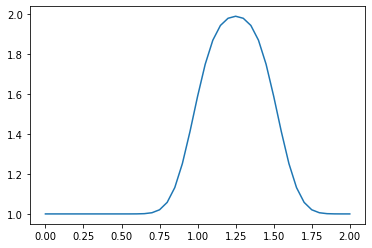

In [ ]:
linearconv(41)

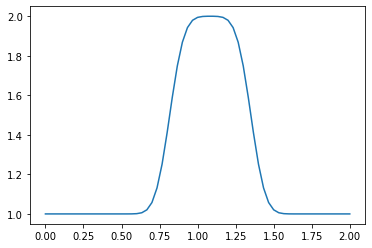

In [ ]:
linearconv(61)

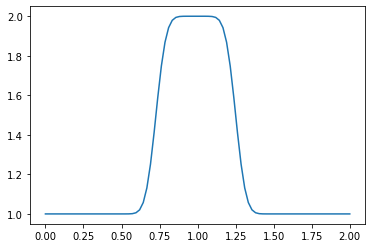

In [ ]:
linearconv(85)

Observe que à medida que o número de pontos nx aumenta, a onda convecta uma distância cada vez menor. O número de iterações de tempo em que avançamos a solução é mantido constante em nt = 20, mas dependendo do valor de nx e dos valores correspondentes de dx e dt, uma janela de tempo mais curta está sendo examinada em geral.

Veja o que acontece quando implementamos a condição de Corrant
 no integração da equação de convecção não-linear: 

In [ ]:
def nonlinearconv(nx):
  dx = 2/(nx-1)
  nt =20
  sigma = 0.5
  dt = sigma *dx 
  c= 1 

  u = np.ones(nx)
  u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s
  un= np.ones(nx)

  for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
      u[i] = un[i] - un[i] * dt / dx * (un[i]-un[i-1])


  plt.plot(np.linspace(0,2,nx),u)
  plt.show()  

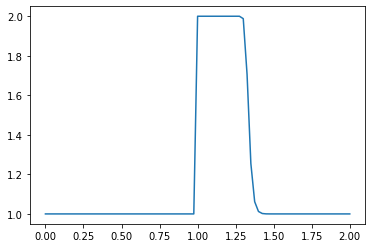

In [ ]:
nonlinearconv(81)

## Equação de difusão unidimensional

A equação de difusão unidimensional é dada por:
$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

A primeira coisa que você deve notar é que - a exemplo das duas equações simples anteriores que estudamos - esta equação tem uma derivada de segunda ordem. Primeiro precisamos aprender o que fazer com ela!


A derivada de segunda ordem pode ser representada geometricamente como a linha tangente à curva dada pela primeira derivada.  Descreveremos a derivada de segunda ordem com um esquema de Diferença Central: uma combinação de Diferença para frente e Diferença para trás da primeira derivada.  Considere a expansão de Taylor de $u_{i+1}$ e $u_{i-1}$ em torno de $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

Se adicionarmos estas duas expansões, você pode ver que os termos derivados de número ímpar se cancelarão mutuamente.  Se negligenciarmos qualquer termo de $O(\Delta x^4)$ ou superior (e realmente, esses são muito pequenos), então podemos reorganizar a soma dessas duas expansões para resolver para nosso segundo derivativo.  


$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Em seguida, reordenamos os termos e o resultado é 

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


Podemos agora escrever a versão discretizada da equação de difusão em 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Como antes, notamos que uma vez que temos uma condição inicial, o único desconhecido é $u_{i}^{n+1}$, então reordenamos a solução da equação para a nossa incógnita:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

A equação discreta acima nos permite escrever um programa para avançar uma solução no tempo. Mas precisamos de uma condição inicial. Vamos continuar usando nossa favorita: a função chapéu. Assim, a $t=0$, $u=2$ no intervalo $0,5\le x\le 1$ e $u=1$ em todos os outros lugares. Estamos prontos para a numeração!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
nx  = 41
dx = 2 / (nx-1)
nt = 100 
nu = 0.3 
sigma = 0.2
dt = sigma * dx**2 /nu


In [ ]:
u = np.ones(nx)
u[int( 0.5/ dx ):int( 1 / dx + 1 )] = 2

In [ ]:
un = np.ones(nx)

In [ ]:
for n in range (nt):
  un = u.copy()
  for i in range (1, nx-1):

    u[i] = un[i] + nu * dt / dx**2 * (un[i+1]-2*un[i]+un[i-1])
     

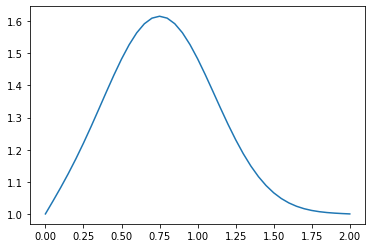

In [ ]:
plt.plot(np.linspace(0,2,nx),u)
plt.show()

In [ ]:
nt*dt

0.1666666666666667